## 10.2 주택데이터 탐색
머신러닝 교과서 with 파이썬, 사이킷런, 텐서플로 p.351

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

### 10.2.1 데이터프레임으로 주택 데이터 셋 읽기

In [7]:
df = pd.read_csv('http://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch10/housing.data.txt',
                header = None,
                sep = '\s+')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM',
              'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### 10.2.2 데이터셋의 중요 특징 시각화

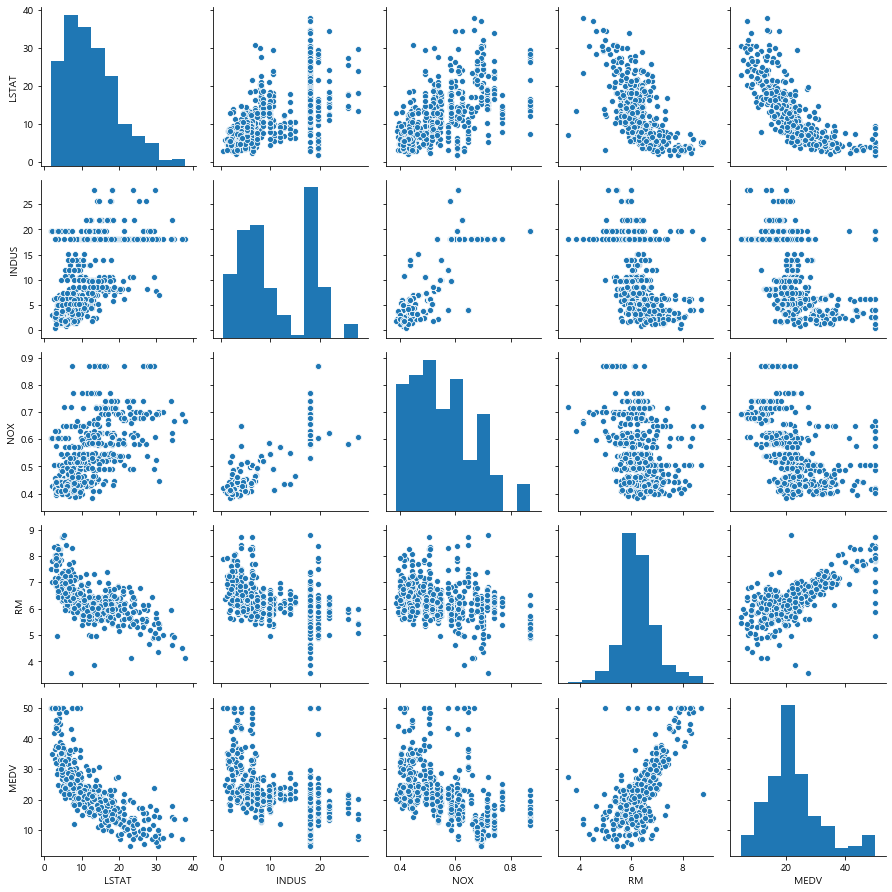

In [12]:
cols = ['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df[cols], height = 2.5)
plt.tight_layout()

plt.show()

### 10.2.3 상관관계 행렬을 사용한 분석

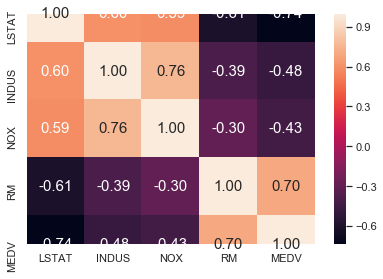

In [24]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size':15},
                yticklabels=cols, xticklabels=cols)
plt.tight_layout()
plt.show()

## 10.3 최소 제곱 선형 회귀 모델

### 10.3.1 경사하강법으로 회귀모델 파라미터 구하기

In [40]:
class LinearRegressionGD(object):
    
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self

    def net_input(self,X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        return self.net_input(X)

In [41]:
X = df[['RM']].values
y = df['MEDV'].values

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

lr = LinearRegressionGD()
lr.fit(X_std, y_std)

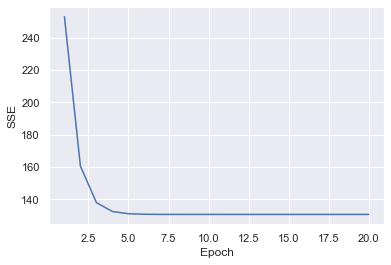

In [42]:
plt.plot(range(1, lr.n_iter+1),lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')

plt.show()

In [43]:
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='steelblue',edgecolor='white',s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

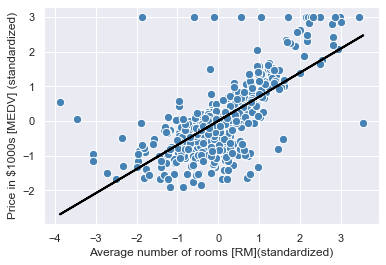

In [44]:
lin_regplot(X_std, y_std, lr)

plt.xlabel('Average number of rooms [RM](standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

In [46]:
num_rooms_std = sc_x.transform([[5.0]])
price_std = lr.predict(num_rooms_std)
print("$1,000 단위가격: %.3f" %sc_y.inverse_transform(price_std))

$1,000 단위가격: 10.840


In [47]:
print('기울기: %.3f' %lr.w_[1])
print('절편: %.3f' %lr.w_[0])

기울기: 0.695
절편: -0.000
